# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [ ]:
df=pd.read_csv("/content/dataset_practical.csv")

# Data Understanding

In [ ]:
df.head()

,gender,height,weight
0,female,167.0,59.00
1,female,189.0,50.00
2,female,163.0,NaN
3,male,166.0,62.20
4,male,166.0,90.55


In [ ]:
df.tail()

,gender,height,weight
21,female,155.00,70.0
22,male,190.20,94.7
23,male,177.45,87.0
24,female,166.89,NaN
25,NaN,190.20,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  23 non-null     object 
 1   height  25 non-null     float64
 2   weight  22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes


In [ ]:
df.describe()

,height,weight
count,25.000000,22.000000
mean,171.979200,70.143636
std,12.486924,16.358704
min,145.000000,42.000000
25%,165.000000,59.800000
50%,167.000000,66.700000
75%,182.500000,88.500000
max,190.200000,94.700000


# Data Cleaning

## Duplicate Value Handling

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Preprocessing

In [ ]:
df['gender'].value_counts()

,count
gender,
female,12
male,9
female…,1
female///,1


In [ ]:
df['gender']=df['gender'].str.replace('[^a-zA-Z]','',regex=True)

In [ ]:
df['gender'].value_counts()

,count
gender,
female,14
male,9


In [ ]:
df['gender']=df['gender'].map({'female':0, 'male':1})

In [ ]:
df.head()

,gender,height,weight
0,0.0,167.0,59.00
1,0.0,189.0,50.00
2,0.0,163.0,NaN
3,1.0,166.0,62.20
4,1.0,166.0,90.55


## Null Value Handling

In [ ]:
df.isna().sum()

,0
gender,2
height,1
weight,3


In [ ]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [ ]:
df['height']=df['height'].fillna(df['height'].median())
df['weight']=df['weight'].fillna(df['weight'].median())

In [ ]:
df.isna().sum()

,0
gender,0
height,0
weight,0


# EDA

## Visualization, Correlation Analysis

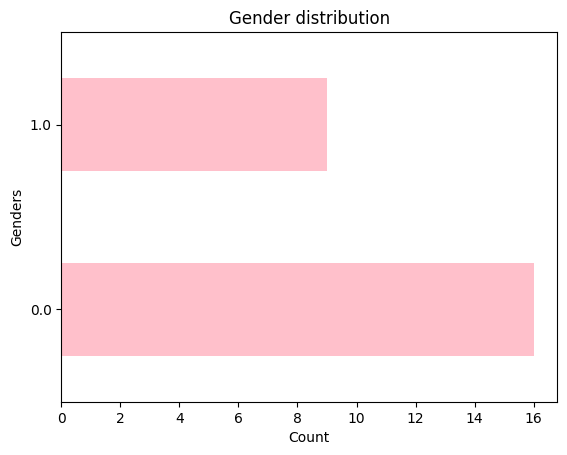

In [ ]:
df['gender'].value_counts().plot(kind='barh', color='pink')
plt.title("Gender distribution")
plt.xlabel("Count")
plt.ylabel("Genders")
plt.show()

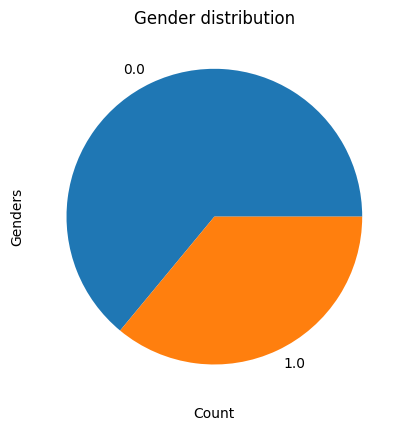

In [ ]:
df['gender'].value_counts().plot(kind='pie', color='pink')
plt.title("Gender distribution")
plt.xlabel("Count")
plt.ylabel("Genders")
plt.show()

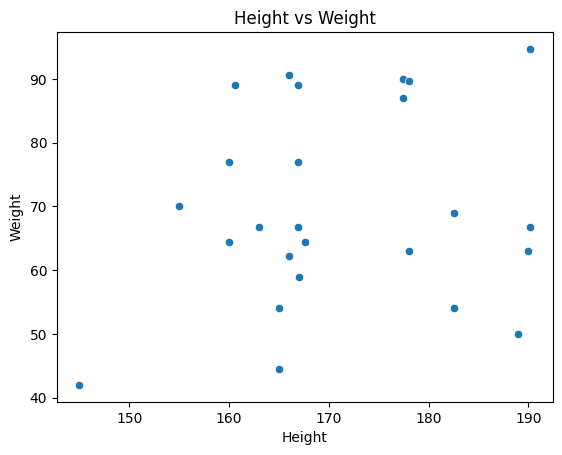

In [ ]:
sns.scatterplot(x=df['height'], y=df['weight'])
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

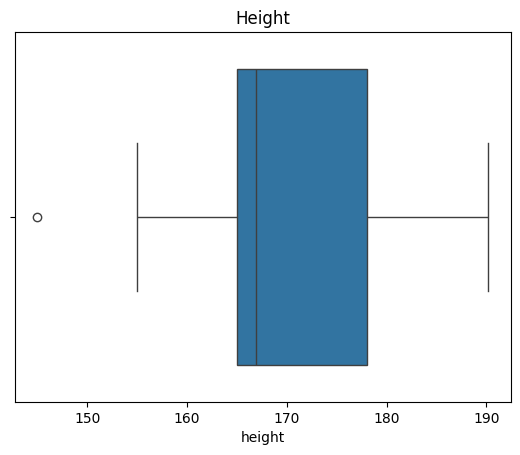

In [ ]:
sns.boxplot(x=df['height'])
plt.title("Height")
plt.show()

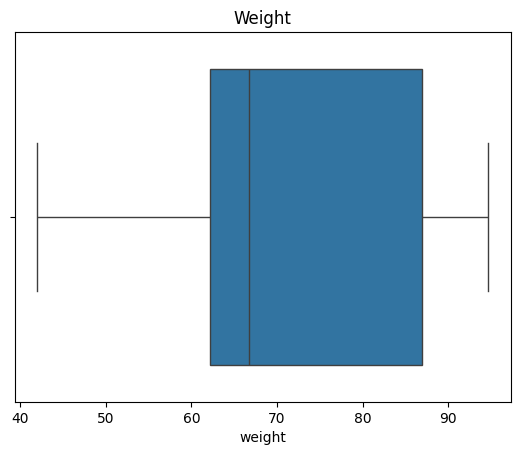

In [ ]:
sns.boxplot(x=df['weight'])
plt.title("Weight")
plt.show()

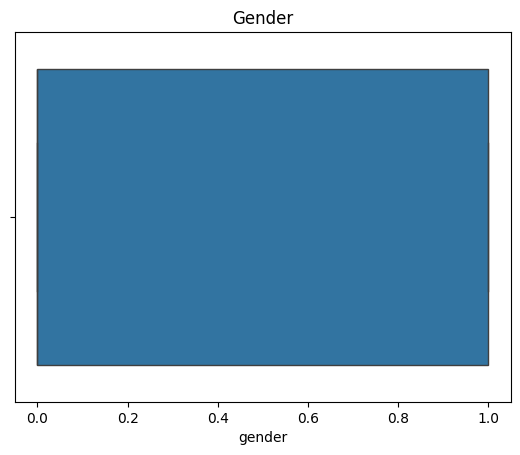

In [ ]:
sns.boxplot(x=df['gender'])
plt.title("Gender")
plt.show()

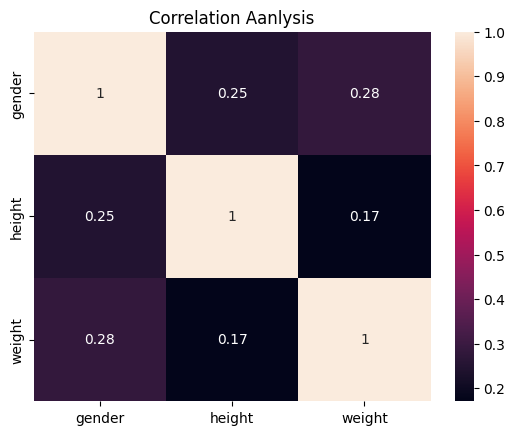

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Aanlysis")
plt.show()

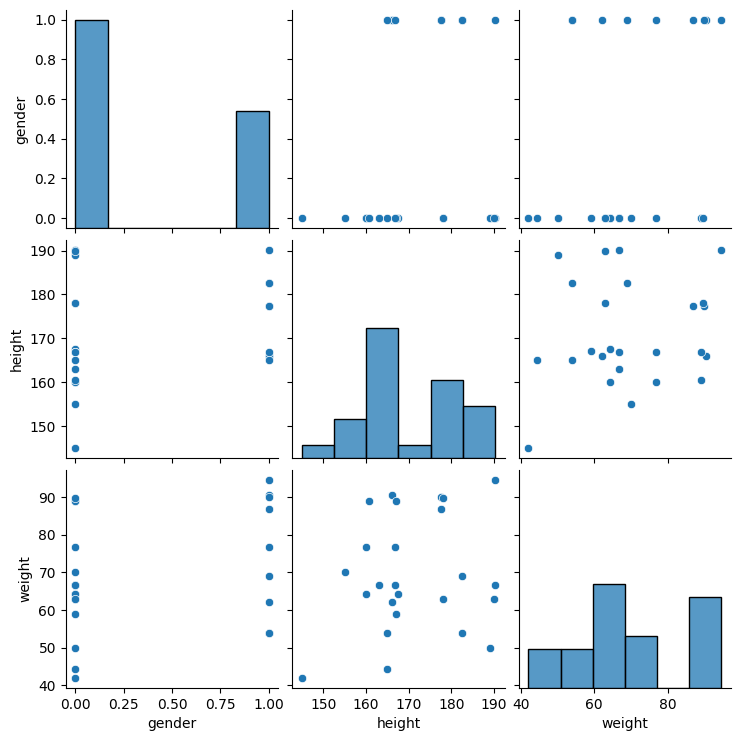

In [ ]:
sns.pairplot(df)